<a href="https://colab.research.google.com/github/Akhilrnadh/loanStatusPrediction/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
#import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
loan_dataset = pd.read_csv("Loan_Dataset2.csv")

In [ ]:
#displaying top 5 records
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# displaying the total no of rows and colums
loan_dataset.shape

(614, 13)

In [ ]:
# getting some statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# checking for null values in dataset
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping all the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# again checking for null values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# displaying the total rows after dropping missing values
loan_dataset.shape

(480, 13)

<Axes: xlabel='Education', ylabel='count'>

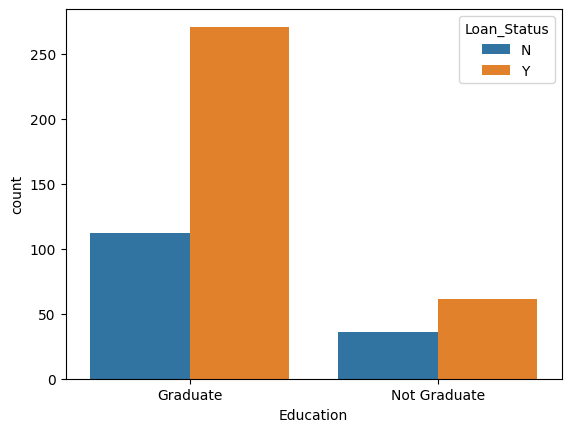

In [ ]:
#plotting relational graphs
# Education and Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

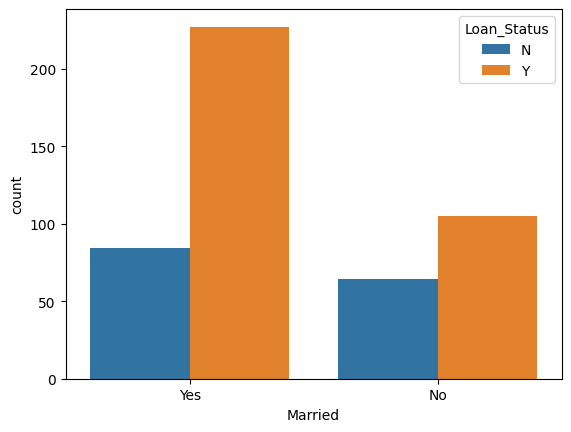

In [ ]:
# Married and Loan_Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

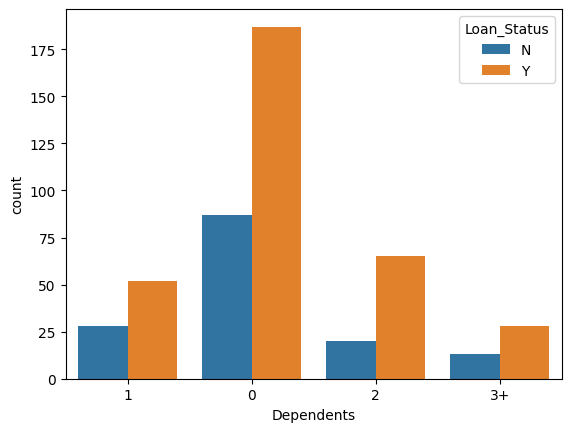

In [ ]:
# Dependents & Loan Staus
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

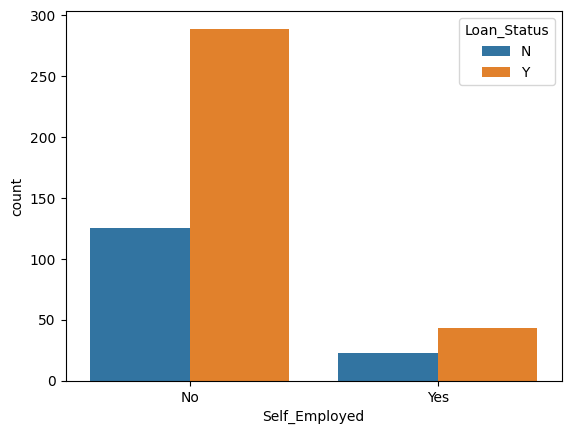

In [ ]:
# Self Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

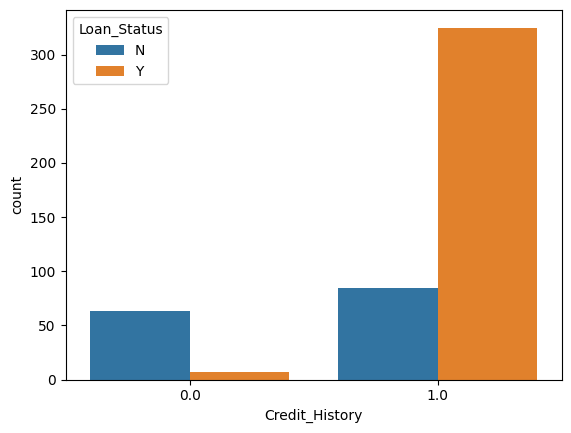

In [ ]:
# Credit History and Loan Status
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

In [ ]:
# checking catagorical values present in catogorical colum
col = [
    loan_dataset["Gender"].unique(),
    loan_dataset["Married"].unique(),
    loan_dataset["Dependents"].unique(),
    loan_dataset["Education"].unique(),
    loan_dataset["Self_Employed"].unique(),
    loan_dataset["Property_Area"].unique(),
    loan_dataset["Loan_Status"].unique()
]
print(col)

[array(['Male', 'Female'], dtype=object), array(['Yes', 'No'], dtype=object), array(['1', '0', '2', '3+'], dtype=object), array(['Graduate', 'Not Graduate'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Rural', 'Urban', 'Semiurban'], dtype=object), array(['N', 'Y'], dtype=object)]


<Axes: >

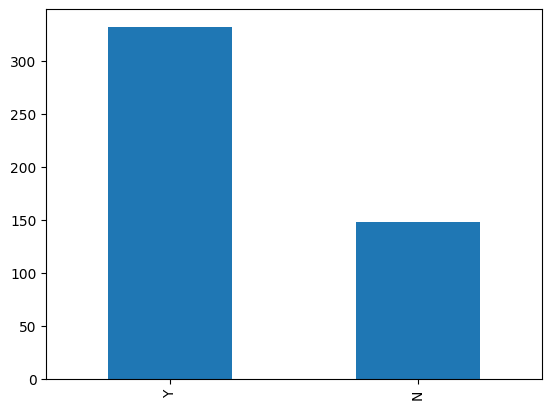

In [ ]:
loan_dataset['Loan_Status'].value_counts().plot.bar()
# 332 peoples loan has been approved out of 480 peoples

In [ ]:
#replacing catogorical value to numerical value
loan_dataset = loan_dataset.replace({
    "Gender":{"Male":1,"Female":0},
    "Married":{"Yes":1,"No":0},
    "Education":{"Graduate":1,"Not Graduate":0},
    "Self_Employed":{"Yes":1,"No":0},
    "Property_Area":{"Rural":0,"Urban":1,"Semiurban":2},
    "Loan_Status":{"Y":1,"N":0}
})

In [ ]:
# displaying top 5 records
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
# changing dependents value 3+ to 3
loan_dataset["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
loan_dataset = loan_dataset.replace({"Dependents":{"3+":3}})
loan_dataset["Dependents"].unique()

array(['1', '0', '2', 3], dtype=object)

In [ ]:
# display top 5 rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
# Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Splitting Data and Label part
# dropping Loan_ID & Loan_Status
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

#displaying the split data and label
#print(X)
#print(Y)

# displaying 5 rows
#loan_dataset.head()

In [ ]:
# Applying feature scaling
col = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term"
]
scalar = StandardScaler()
X[col] = scalar.fit_transform(X[col])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0
2,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,1
3,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,1
4,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,1
5,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.435196,-0.604633,-0.916831,0.275542,1.0,0
610,1,1,3,1,0,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0
611,1,1,1,1,0,0.478206,-0.512854,1.346168,0.275542,1.0,1
612,1,1,2,1,0,0.391846,-0.604633,0.525520,0.275542,1.0,1


In [ ]:
#train,test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
#getting split size
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [ ]:
#Assigning Average cross val score
model_df={}
# creating a function for model evaluation
def model_val(model,X,Y):

  model.fit(X_train,Y_train)
  Pred_Y = model.predict(X_test)

  # Calculating Accuracy Score for training data
  Pred_X = model.predict(X_train)
  Train_Model_Accuracy = accuracy_score(Pred_X,Y_train)

  # Calculating Accuracy Score for test data
  Model_Accuracy = accuracy_score(Pred_Y,Y_test)
  # Printing the accuracy score for train and test data
  print(f"{model} training accuracy score is {Train_Model_Accuracy}")
  print(f"{model} test accuracy score is {Model_Accuracy}")

  #Implementing cross validation for better prediction
  score = cross_val_score(model,X,Y,cv=2)
  print(f"{model} Average cross val score is {np.mean(score)}")
  model_df[model] = round(np.mean(score)*100,2)

In [ ]:
# Classifier Model Evaluation
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_df

{SVC(): 80.21,
 RandomForestClassifier(): 78.33,
 GradientBoostingClassifier(): 78.12,
 DecisionTreeClassifier(): 71.67,
 LogisticRegression(): 81.25}

In [ ]:
# SVM - Support Vector Machine
model = svm.SVC()
model_val(model,X,Y)

SVC() training accuracy score is 0.8333333333333334
SVC() test accuracy score is 0.8020833333333334
SVC() Average cross val score is 0.8020833333333333


In [ ]:
# RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() training accuracy score is 1.0
RandomForestClassifier() test accuracy score is 0.8125
RandomForestClassifier() Average cross val score is 0.7833333333333333


In [ ]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,Y)

GradientBoostingClassifier() training accuracy score is 0.9114583333333334
GradientBoostingClassifier() test accuracy score is 0.7604166666666666
GradientBoostingClassifier() Average cross val score is 0.78125


In [ ]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() training accuracy score is 1.0
DecisionTreeClassifier() test accuracy score is 0.7395833333333334
DecisionTreeClassifier() Average cross val score is 0.7166666666666667


In [ ]:
# LogisticRegression
model = LogisticRegression()
model_val(model,X,Y)

LogisticRegression() training accuracy score is 0.8046875
LogisticRegression() test accuracy score is 0.8229166666666666
LogisticRegression() Average cross val score is 0.8125


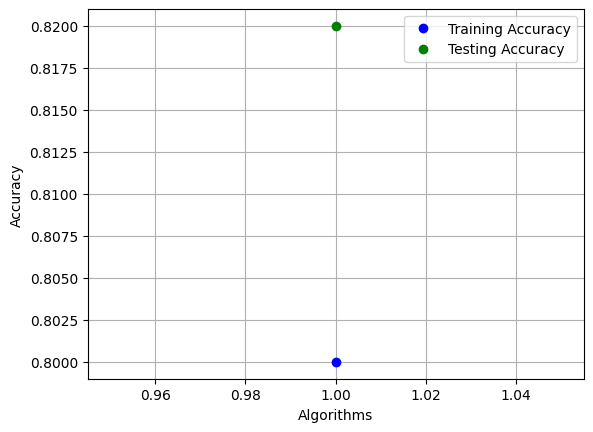

In [ ]:
#Training and testing Accuracy Graph based on Logistic Regression
training_data_accuracy = [0.80]
test_data_accuracy = [0.82]
algorithm = range(1,len(training_data_accuracy)+1)

#creating line plot using Seaborn
plt.plot(algorithm,training_data_accuracy,'bo', label='Training Accuracy')
plt.plot(algorithm,test_data_accuracy,'go', label='Testing Accuracy')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# From the above LogisticRegression is best for Loan Prediction
# Developing a Loan Prediction model using LogisticRegression

# Importing sample data
data = [[1,1,0,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,1]]
#data = [[1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,0.0,1]]
#data = [[1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,0.0,1]]
model = LogisticRegression()
model.fit(X_train,Y_train)

pred_YData = model.predict(data)
print(pred_YData)
if(pred_YData == 0):
  print("Loan is Rejected")
else:
  print("Loan is Approved")

[1]
Loan is Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
